# Goal:

The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk in individuals, using various parameters/features.

# Dataset Description:


* 'id'                  : id 
* 'Gender'              : Gender
* 'Age'                 : Age 
* 'Height'              : Height is in meter
* 'Weight'              : Weight is between 39 to 165
* 'family_history_with_overweight' : family history with overweight yes or no
* 'FAVC'                : Frequent consumption of high calorie food yes or no 
* 'FCVC'                : Frequency of consumption of vegetables yes or no 
* 'NCP'                 : Number of main meals
* 'CAEC'                : Consumption of food between meals
* 'SMOKE'               : yes or no 
* 'CH2O'                : Consumption of water daily
* 'SCC'                 : Calories consumption monitoring yes or no 
* 'FAF'                 : Physical activity frequency
* 'TUE'                 : Time using technology devices "How long using technology devices to track your health"
* 'CALC'                : Consumption of alcohol
* 'MTRANS'              : Transportation used
* 'NObeyesdad'          : Target Obesity 

# NObesity values:

*	Insufficient_Weight: Less than 18.5
*	Normal_Weight: 18.5 to 24.9
*	Obesity_Type_I: 30.0 to 34.9
*	Obesity_Type_II: 35.0 to 39.9
*	Obesity_Type_III: Higher than 40
*	Overweight_Level_I, Overweight_Level_II takes values between 25.0 to 29.9

In [ ]:
# Importing Required Libraries
# Data manipulation
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer
)
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, StratifiedGroupKFold, GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
)

# Encoders
from category_encoders import OneHotEncoder, CatBoostEncoder, MEstimateEncoder

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
)

# Boosting Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Loading data:
data1 = pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test_data = pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")
n_splits = 10
RANDOM_SEED = 43

# Models

## Cross validation and Decision tree model

In [31]:
X = data1.drop("NObeyesdad", axis=1)
y = data1['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

type(skf.split(X,y))

generator

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Decision Tree classifier
classifier1 = DecisionTreeClassifier(random_state=42)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
    # Train the classifier on the training set
    classifier1.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier1.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

Accuracy across one fold: 0.8451348747591522
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.87      0.88       505
      Normal_Weight       0.79      0.81      0.80       616
     Obesity_Type_I       0.81      0.81      0.81       582
    Obesity_Type_II       0.95      0.95      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.64      0.62      0.63       485
Overweight_Level_II       0.72      0.73      0.73       505

           accuracy                           0.85      4152
          macro avg       0.83      0.83      0.83      4152
       weighted avg       0.84      0.85      0.84      4152

Accuracy across one fold: 0.8407996146435452
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89       505
      Normal_Weight       0.78      0.80      0.79       616
     Obesity_Type_I       0.79      0.81      0.80  

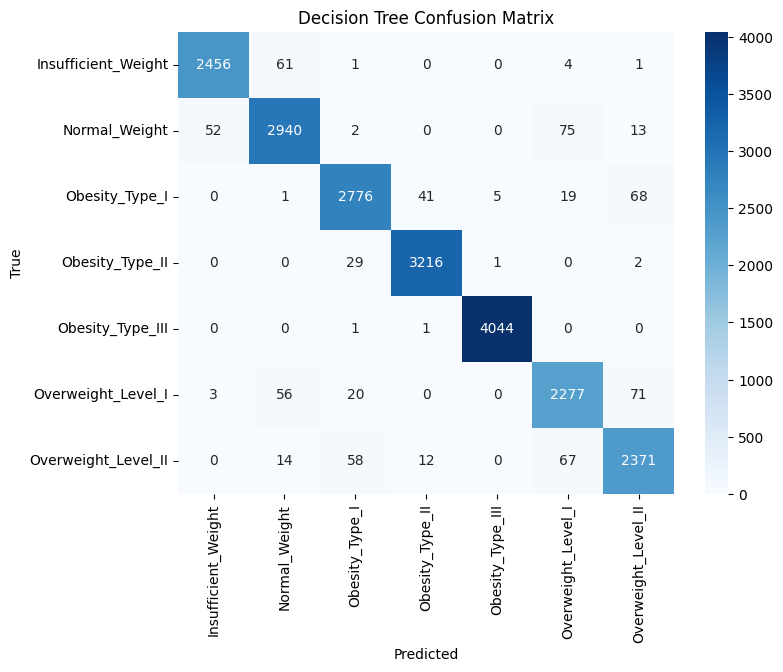

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier1.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier1.classes_, yticklabels=classifier1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [35]:
#Small sample for decision tree visualization
from sklearn.utils import shuffle

data_sample1 = shuffle(data1, random_state=42).head(100)  
data_sample2 = shuffle(data1, random_state=42).head(100)
X_sample = data_sample1.drop("NObeyesdad", axis=1)
X_encoded1 = pd.get_dummies(X_sample)
y_sample = data_sample2["NObeyesdad"]

classifier_sample = DecisionTreeClassifier(random_state=42)

classifier_sample.fit(X_encoded1, y_sample)

DecisionTreeClassifier(random_state=42)

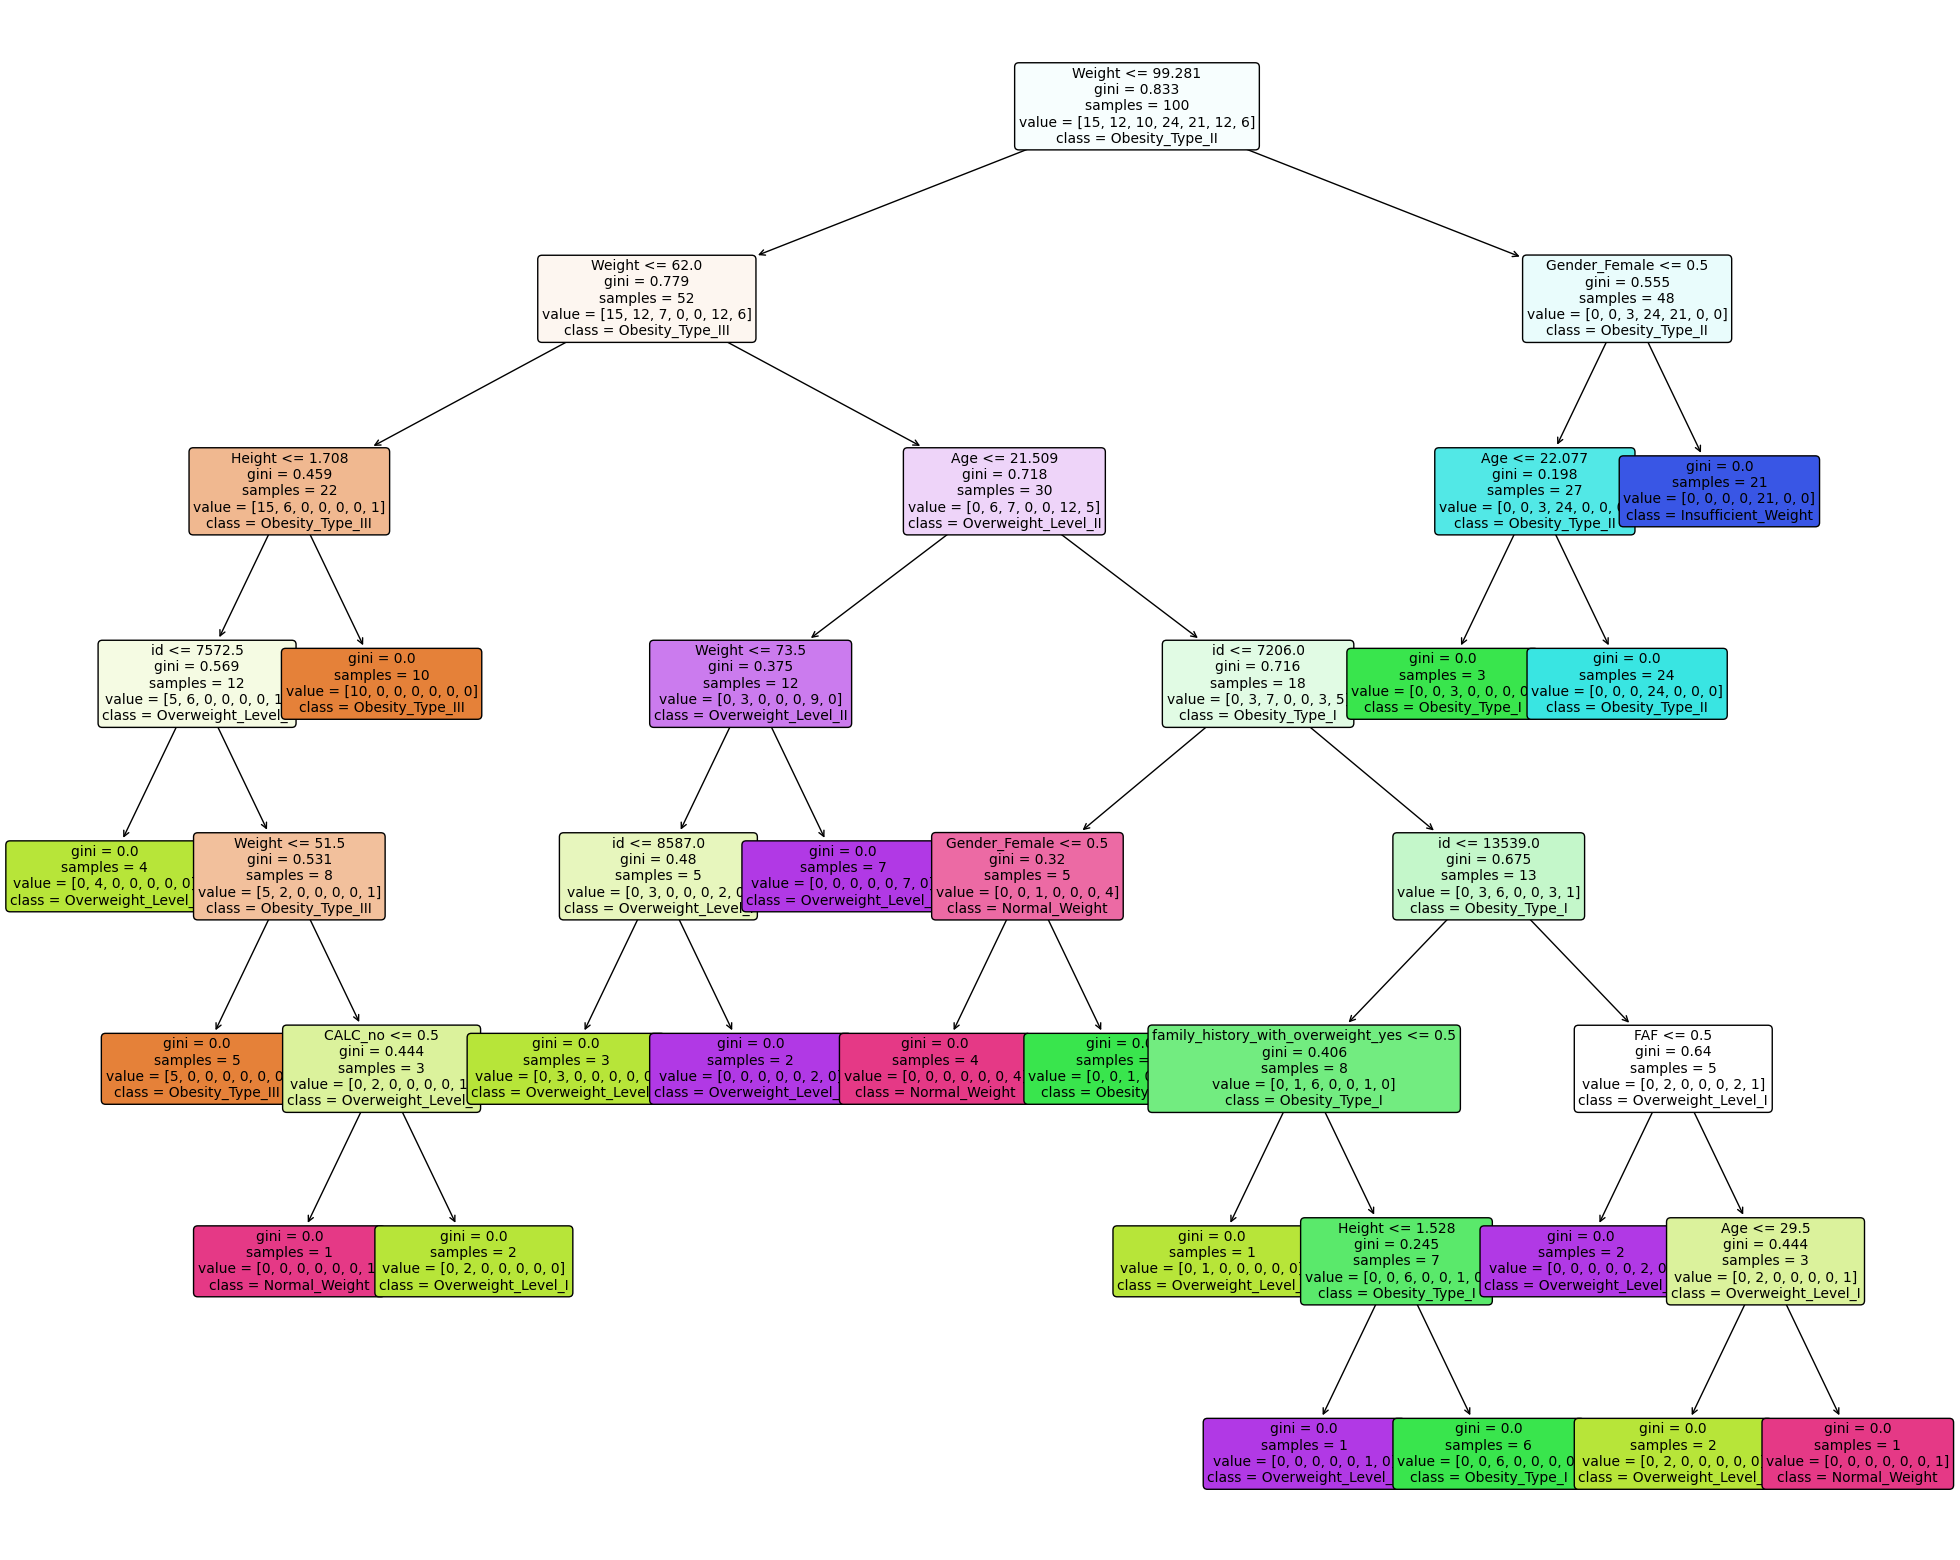

In [36]:
from sklearn import tree
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(classifier_sample,
              feature_names=X_encoded1.columns,
              class_names=y_sample.unique(),
              filled=True,
              rounded=True,
              fontsize=10)
plt.show()

In [37]:
from sklearn import tree
from sklearn.tree import export_text

classifier1.fit(X_encoded, y)
tree_rules = export_text(classifier1, feature_names= list(X_encoded.columns), spacing=3, decimals=2)
print(tree_rules)

|--- Weight <= 99.54
|   |--- Weight <= 76.04
|   |   |--- Weight <= 55.00
|   |   |   |--- Height <= 1.64
|   |   |   |   |--- Weight <= 46.83
|   |   |   |   |   |--- Weight <= 44.93
|   |   |   |   |   |   |--- CAEC_no <= 0.50
|   |   |   |   |   |   |   |--- FCVC <= 2.04
|   |   |   |   |   |   |   |   |--- NCP <= 1.04
|   |   |   |   |   |   |   |   |   |--- Height <= 1.59
|   |   |   |   |   |   |   |   |   |   |--- family_history_with_overweight_no <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- family_history_with_overweight_no >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- Height >  1.59
|   |   |   |   |   |   |   |   |   |   |--- family_history_with_overweight_no <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Insufficient_Weight
|   |   |   |   |   |   |   |   |   |   |--- family_history_with_overwei

## Logistic Regresion Model

In [123]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifierl = LogisticRegression(random_state=42)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier on the training set
    classifierl.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifierl.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')


c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_

Accuracy across one fold: 0.29359344894026973
                     precision    recall  f1-score   support

Insufficient_Weight       0.50      0.37      0.43       505
      Normal_Weight       0.26      0.31      0.28       616
     Obesity_Type_I       0.00      0.00      0.00       582
    Obesity_Type_II       0.07      0.06      0.06       650
   Obesity_Type_III       0.32      0.99      0.48       809
 Overweight_Level_I       0.00      0.00      0.00       485
Overweight_Level_II       0.14      0.02      0.03       505

           accuracy                           0.29      4152
          macro avg       0.18      0.25      0.18      4152
       weighted avg       0.19      0.29      0.20      4152



c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_

Accuracy across one fold: 0.2697495183044316
                     precision    recall  f1-score   support

Insufficient_Weight       0.44      0.43      0.43       505
      Normal_Weight       0.20      0.20      0.20       616
     Obesity_Type_I       0.03      0.00      0.00       582
    Obesity_Type_II       0.02      0.01      0.02       649
   Obesity_Type_III       0.29      0.95      0.44       809
 Overweight_Level_I       0.00      0.00      0.00       486
Overweight_Level_II       0.50      0.01      0.02       505

           accuracy                           0.27      4152
          macro avg       0.21      0.23      0.16      4152
       weighted avg       0.21      0.27      0.17      4152



c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_

Accuracy across one fold: 0.28901734104046245
                     precision    recall  f1-score   support

Insufficient_Weight       0.39      0.41      0.40       504
      Normal_Weight       0.23      0.23      0.23       617
     Obesity_Type_I       0.00      0.00      0.00       582
    Obesity_Type_II       0.12      0.16      0.14       649
   Obesity_Type_III       0.36      0.91      0.52       810
 Overweight_Level_I       0.00      0.00      0.00       486
Overweight_Level_II       0.14      0.01      0.02       504

           accuracy                           0.29      4152
          macro avg       0.18      0.25      0.19      4152
       weighted avg       0.19      0.29      0.21      4152



c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_

Accuracy across one fold: 0.293905083112503
                     precision    recall  f1-score   support

Insufficient_Weight       0.44      0.42      0.43       504
      Normal_Weight       0.22      0.25      0.23       617
     Obesity_Type_I       0.09      0.01      0.02       582
    Obesity_Type_II       0.08      0.07      0.08       650
   Obesity_Type_III       0.36      0.95      0.52       809
 Overweight_Level_I       0.00      0.00      0.00       485
Overweight_Level_II       0.21      0.07      0.10       504

           accuracy                           0.29      4151
          macro avg       0.20      0.25      0.20      4151
       weighted avg       0.21      0.29      0.22      4151

Accuracy across one fold: 0.29775957600578173
                     precision    recall  f1-score   support

Insufficient_Weight       0.43      0.46      0.44       505
      Normal_Weight       0.22      0.24      0.23       616
     Obesity_Type_I       0.00      0.00      0.00  

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_

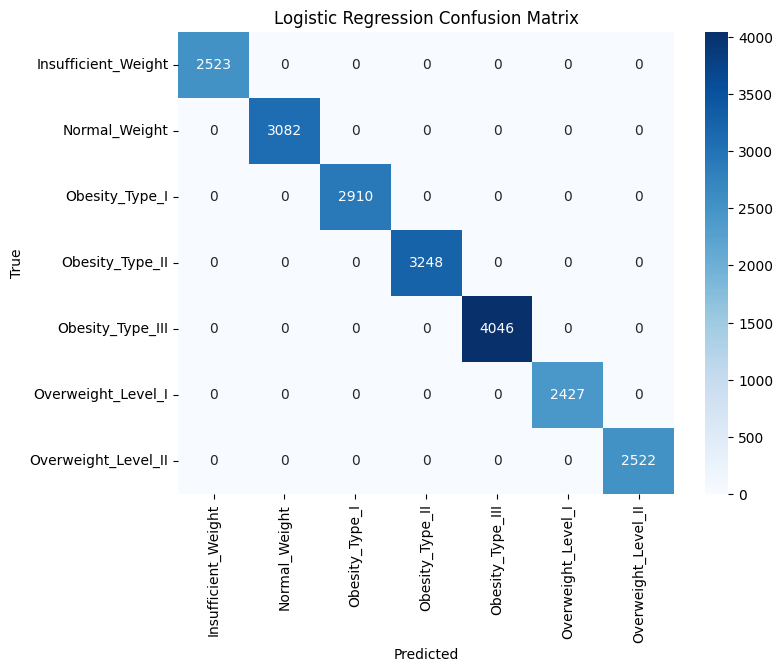

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier1.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifierl.classes_, yticklabels=classifierl.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Random Forest Model

In [41]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifier2 = RandomForestClassifier(random_state=42)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier on the training set
    classifier2.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier2.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')


Accuracy across one fold: 0.8986030828516378
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.92       505
      Normal_Weight       0.84      0.89      0.87       616
     Obesity_Type_I       0.90      0.88      0.89       582
    Obesity_Type_II       0.97      0.98      0.98       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.79      0.72      0.75       485
Overweight_Level_II       0.79      0.80      0.79       505

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152

Accuracy across one fold: 0.8880057803468208
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.93       505
      Normal_Weight       0.82      0.89      0.85       616
     Obesity_Type_I       0.88      0.88      0.88  

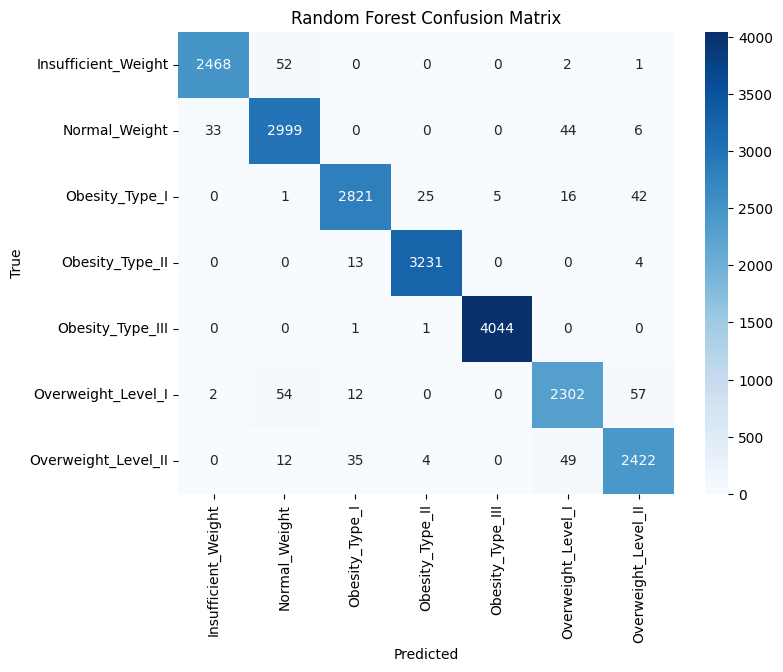

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier2.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier2.classes_, yticklabels=classifier2.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

## LGBM Model

In [43]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifier3 = LGBMClassifier(random_state=42)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier on the training set
    classifier3.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier3.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
Accuracy across one fold: 0.910645472061657
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       505
      Normal_Weight       0.89      0.90      0.89       616
     Obesity_Type_I       0.90      0.88 

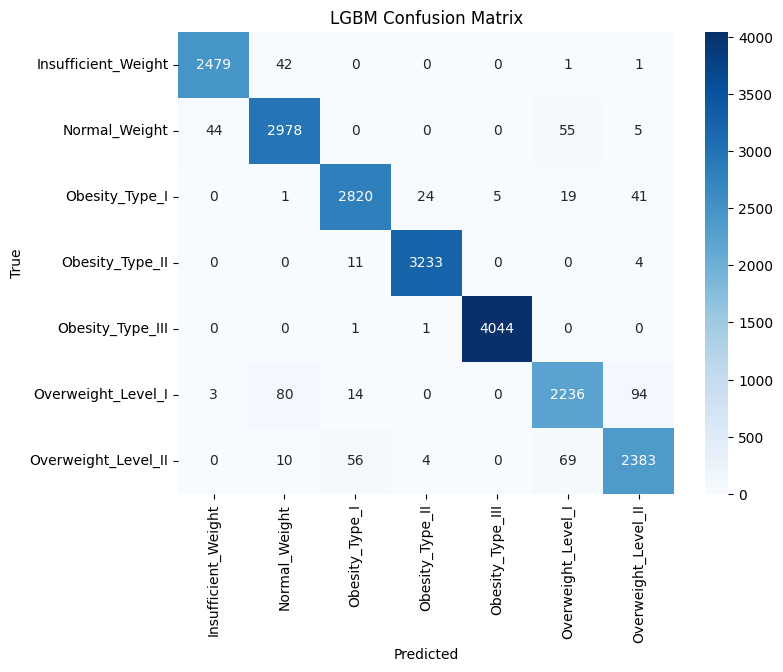

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier3.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier3.classes_, yticklabels=classifier3.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LGBM Confusion Matrix')
plt.show()

## XGB Model

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifier4 = XGBClassifier(random_state=42)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    y_trainc, y_valc = le.fit_transform(y_train), le.fit_transform(y_val)
    
    # Train the classifier on the training set
    classifier4.fit(X_train, y_trainc)

    # Make predictions on the validation set
    y_pred = classifier4.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_valc, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_valc, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

Accuracy across one fold: 0.9065510597302505
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       505
           1       0.88      0.88      0.88       616
           2       0.90      0.89      0.89       582
           3       0.98      0.98      0.98       650
           4       1.00      1.00      1.00       809
           5       0.77      0.78      0.77       485
           6       0.81      0.82      0.81       505

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

Accuracy across one fold: 0.9026974951830443
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       505
           1       0.86      0.89      0.88       616
           2       0.89      0.88      0.89       582
           3       0.96      0.96      0.96       649
           4       1.00      1.00      1.0

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


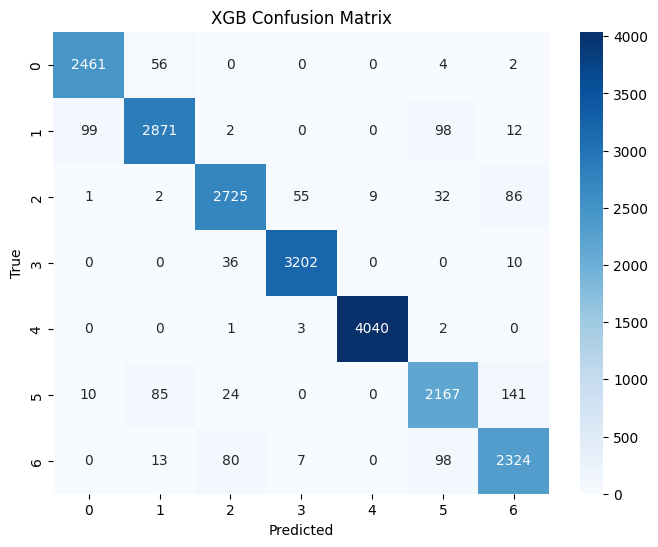

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_predc_all = classifier4.predict(X_encoded)
yc, y_predc_all = le.fit_transform(y), le.fit_transform(y_pred_all)
conf_matrix = confusion_matrix(yc, y_predc_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier4.classes_, yticklabels=classifier4.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGB Confusion Matrix')
plt.show()

## Catboost Model

In [47]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifier5 = CatBoostClassifier(random_state=42, auto_class_weights = 'Balanced', iterations=1000, early_stopping_rounds=50, verbose=50)

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier on the training set
    classifier5.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier5.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

Learning rate set to 0.091318
0:	learn: 1.6691914	total: 169ms	remaining: 2m 48s
50:	learn: 0.4112810	total: 3.87s	remaining: 1m 12s
100:	learn: 0.3324003	total: 6.22s	remaining: 55.4s
150:	learn: 0.2969466	total: 8.91s	remaining: 50.1s
200:	learn: 0.2736717	total: 11.6s	remaining: 46.2s
250:	learn: 0.2563996	total: 14.5s	remaining: 43.4s
300:	learn: 0.2430208	total: 17.6s	remaining: 40.8s
350:	learn: 0.2312604	total: 20.8s	remaining: 38.4s
400:	learn: 0.2201484	total: 23.7s	remaining: 35.5s
450:	learn: 0.2107082	total: 26.1s	remaining: 31.7s
500:	learn: 0.2024719	total: 28.5s	remaining: 28.4s
550:	learn: 0.1941605	total: 30.4s	remaining: 24.8s
600:	learn: 0.1866808	total: 32.4s	remaining: 21.5s
650:	learn: 0.1800691	total: 35.2s	remaining: 18.9s
700:	learn: 0.1734252	total: 38.1s	remaining: 16.3s
750:	learn: 0.1671276	total: 39.8s	remaining: 13.2s
800:	learn: 0.1611886	total: 42.8s	remaining: 10.6s
850:	learn: 0.1561749	total: 45.6s	remaining: 7.98s
900:	learn: 0.1508372	total: 48.4s	

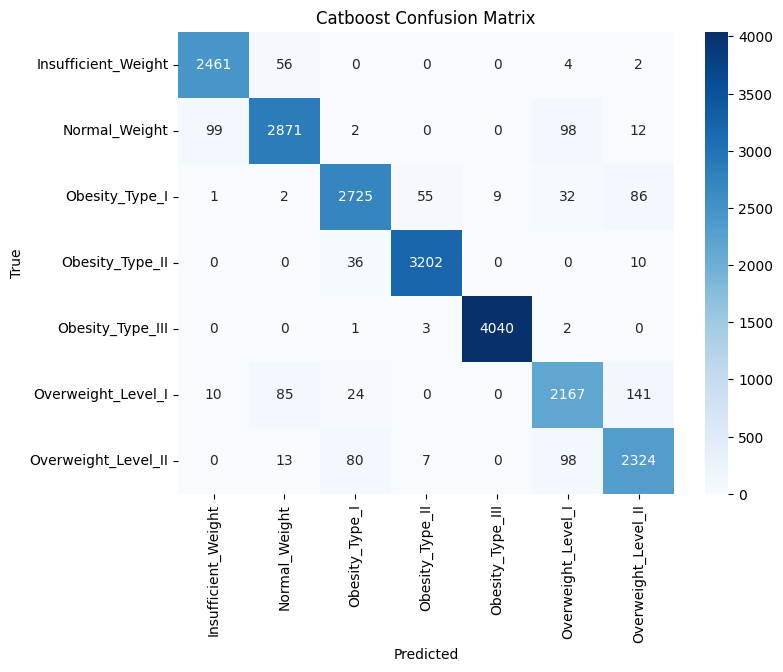

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier5.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier5.classes_, yticklabels=classifier5.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Catboost Confusion Matrix')
plt.show()

## Voting Classifier Model 

In [53]:
from sklearn.model_selection import StratifiedKFold

k_folds = 5 
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# one-hot encoding to categorical features
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest classifier 
classifier6 = VotingClassifier(
    
    estimators = [ 
            ('Model_1_LR', classifierl),
            ('Model_2_DT', classifier1),
            ('Model_3_RF', classifier2),
            ('Model_4_LGBM', classifier3),
            ('Model_5_XGBoost', classifier4),
            ('Model_6_Catboost', classifier5),
            ], 
            voting='soft',
            verbose =2
            )

accuracy_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_val = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier on the training set
    classifier6.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = classifier6.predict(X_val)

    # Evaluate accuracy and store the result
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy across one fold:", accuracy)
    
    print(classification_report(y_val, y_pred))

# Average accuracy across all folds
average_accuracy = sum(accuracy_scores) / k_folds
print(f'Average Accuracy: {average_accuracy:.4f}')

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ............... (1 of 6) Processing Model_1_LR, total=   0.7s
[Voting] ............... (2 of 6) Processing Model_2_DT, total=   0.2s
[Voting] ............... (3 of 6) Processing Model_3_RF, total=   3.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
[Voting] ............. (4 of 6) Processing Model_4_LGBM,

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ............... (1 of 6) Processing Model_1_LR, total=   0.7s
[Voting] ............... (2 of 6) Processing Model_2_DT, total=   0.2s
[Voting] ............... (3 of 6) Processing Model_3_RF, total=   3.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.854637
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146561
[LightGBM] [Info] Start training from score -2.108153
[Voting] ............. (4 of 6) Processing Model_4_LGBM,

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ............... (1 of 6) Processing Model_1_LR, total=   2.2s
[Voting] ............... (2 of 6) Processing Model_2_DT, total=   0.4s
[Voting] ............... (3 of 6) Processing Model_3_RF, total=   5.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 31
[LightGBM] [Info] Start training from score -2.107162
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.854637
[LightGBM] [Info] Start training from score -1.635426
[LightGBM] [Info] Start training from score -2.146561
[LightGBM] [Info] Start training from score -2.107657
[Voting] ............. (4 of 6) Processing Model_4_LGBM, total=   2.9s
[Voting] .......... (5 of 6) Processing Model_5_X

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ............... (1 of 6) Processing Model_1_LR, total=   0.8s
[Voting] ............... (2 of 6) Processing Model_2_DT, total=   0.2s
[Voting] ............... (3 of 6) Processing Model_3_RF, total=   4.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2319
[LightGBM] [Info] Number of data points in the train set: 16607, number of used features: 31
[LightGBM] [Info] Start training from score -2.107222
[LightGBM] [Info] Start training from score -1.907632
[LightGBM] [Info] Start training from score -1.964815
[LightGBM] [Info] Start training from score -1.855082
[LightGBM] [Info] Start training from score -1.635177
[LightGBM] [Info] Start training from score -2.146106
[LightGBM] [Info] Start training from score -2.107717
[Voting] ............. (4 of 6) Processing Model_4_LGBM,

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Voting] ............... (1 of 6) Processing Model_1_LR, total=   0.7s
[Voting] ............... (2 of 6) Processing Model_2_DT, total=   0.2s
[Voting] ............... (3 of 6) Processing Model_3_RF, total=   3.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2324
[LightGBM] [Info] Number of data points in the train set: 16607, number of used features: 31
[LightGBM] [Info] Start training from score -2.107717
[LightGBM] [Info] Start training from score -1.907227
[LightGBM] [Info] Start training from score -1.964815
[LightGBM] [Info] Start training from score -1.855082
[LightGBM] [Info] Start training from score -1.635177
[LightGBM] [Info] Start training from score -2.146106
[LightGBM] [Info] Start training from score -2.107717
[Voting] ............. (4 of 6) Processing Model_4_LGBM,

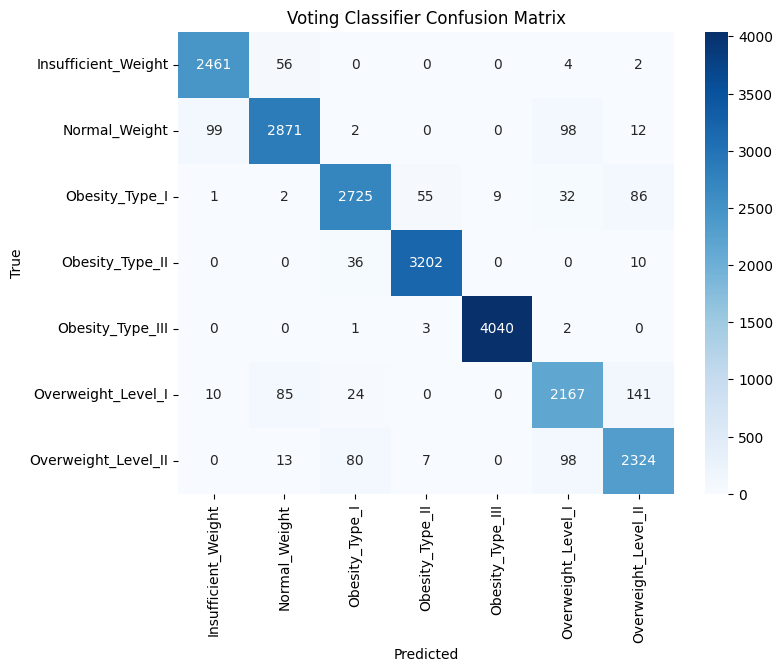

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Confusion matrix on the entire dataset
y_pred_all = classifier5.predict(X_encoded)
conf_matrix = confusion_matrix(y, y_pred_all)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier1.classes_, yticklabels=classifier1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

# Preparing the Test set

In [56]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [58]:
test_data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [ ]:
columns_to_drop = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "SMOKE",
    "MTRANS",
    "NObeyesdad"
]
train_data = data1.drop(columns=columns_to_drop)
# or you can use the preprocessed data from EDA_and_Preprocessing.ipynb file

In [59]:
train_data['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [60]:
test_data['CALC'].unique()
# There seems to be an inconsistency between the categories present in the training set and the test set for the 'CALC' column.

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [61]:
test_data['CALC'].replace('Always','Frequently',inplace=True)

In [62]:
(test_data[test_data['CALC']=='Always']['CALC']).sum()

0

In [92]:
test_data1 = pd.get_dummies(test_data)

Using Voting Classifer as Prediction Model

In [116]:
predictions = classifier6.predict(test_data1)

In [117]:
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [118]:
predictions2 = pd.get_dummies(predictions)

In [119]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
target_order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II' ,'Obesity_Type_III']
ord_encoder = OrdinalEncoder(categories = [target_order])

In [120]:
predictions2

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
13835,0,0,0,0,0,0,1
13836,0,1,0,0,0,0,0
13837,1,0,0,0,0,0,0
13838,0,1,0,0,0,0,0


In [121]:
new_df = predictions2.idxmax(axis=1)
new_df

0            Obesity_Type_II
1         Overweight_Level_I
2           Obesity_Type_III
3             Obesity_Type_I
4           Obesity_Type_III
                ...         
13835    Overweight_Level_II
13836          Normal_Weight
13837    Insufficient_Weight
13838          Normal_Weight
13839        Obesity_Type_II
Length: 13840, dtype: object

In [122]:
labels = pd.DataFrame(new_df,columns=['NObeyesdad'])
labels

,NObeyesdad
0,Obesity_Type_II
1,Overweight_Level_I
2,Obesity_Type_III
3,Obesity_Type_I
4,Obesity_Type_III
...,...
13835,Overweight_Level_II
13836,Normal_Weight
13837,Insufficient_Weight
13838,Normal_Weight


In [91]:
final_predicitons= pd.concat((test_data['id'],labels),axis=1)
final_predicitons

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_I
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# Thank You